# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [4]:
cities

['clyde river',
 'yellowknife',
 'vaini',
 'tubuala',
 'jamestown',
 'pasil',
 'barrow',
 'rikitea',
 'puerto vallarta',
 'port alfred',
 'dikson',
 'castro',
 'hilo',
 'taolanaro',
 'atuona',
 'provideniya',
 'saint george',
 'krasnoarmeysk',
 'ilulissat',
 'itarema',
 'belushya guba',
 'teya',
 'kapaa',
 'albany',
 'kirovskiy',
 'taoudenni',
 'severo-kurilsk',
 'cape town',
 'hobart',
 'veraval',
 'kegayli',
 'licata',
 'ushuaia',
 'ponta do sol',
 'punta arenas',
 'bluff',
 'vestmannaeyjar',
 'saint-philippe',
 'canon city',
 'huron',
 'new norfolk',
 'lebowakgomo',
 'thompson',
 'college',
 'verkhnetulomskiy',
 'nizhneyansk',
 'talnakh',
 'carbondale',
 'touros',
 'falun',
 'comodoro rivadavia',
 'grand river south east',
 'richards bay',
 'saldanha',
 'amderma',
 'souillac',
 'leh',
 'murchison',
 'ahar',
 'illoqqortoormiut',
 'lengshuijiang',
 'omboue',
 'mataura',
 'tautira',
 'cidreira',
 'xichang',
 'balkanabat',
 'kosa',
 'semey',
 'wuwei',
 'deputatskiy',
 'mahebourg',
 'ner

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key
url = 'http://api.openweathermap.org/data/2.5/weather?q=&APPID=' + weather_api_key
print(requests.get(url))

<Response [400]>


In [8]:
#Initiate counter for city number below
number = 1

#Creating lists
city_name = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

print("Beginning Data Retrieval")
print("------------------------")

#Loop through each city, extract required items, and print result
for city in cities:
    try:
        city_data = (requests.get(url + '&q=' + city)).json()
        city_name.append(city_data['name'])
        latitude.append(city_data['coord']['lat'])
        longitude.append(city_data['coord']['lon'])
        temperature.append(city_data['main']['temp'])
        humidity.append(city_data['main']['humidity'])
        cloudiness.append(city_data['clouds']['all'])
        wind_speed.append(city_data['wind']['speed'])
        print(f'Processing Record {number} of Set 1 |{city}')
        number = number + 1
    
    except KeyError:
        print(f'No information for {city}. Skipping...')
        number = number + 1
        
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 |clyde river
Processing Record 2 of Set 1 |yellowknife
Processing Record 3 of Set 1 |vaini
Processing Record 4 of Set 1 |tubuala
Processing Record 5 of Set 1 |jamestown
Processing Record 6 of Set 1 |pasil
Processing Record 7 of Set 1 |barrow
Processing Record 8 of Set 1 |rikitea
Processing Record 9 of Set 1 |puerto vallarta
Processing Record 10 of Set 1 |port alfred
Processing Record 11 of Set 1 |dikson
Processing Record 12 of Set 1 |castro
Processing Record 13 of Set 1 |hilo
No information for taolanaro. Skipping...
Processing Record 15 of Set 1 |atuona
Processing Record 16 of Set 1 |provideniya
Processing Record 17 of Set 1 |saint george
Processing Record 18 of Set 1 |krasnoarmeysk
Processing Record 19 of Set 1 |ilulissat
Processing Record 20 of Set 1 |itarema
No information for belushya guba. Skipping...
Processing Record 22 of Set 1 |teya
Processing Record 23 of Set 1 |kapaa
Processing Record 24 of Set 1

Processing Record 201 of Set 1 |margate
No information for jarjis. Skipping...
Processing Record 203 of Set 1 |guapi
Processing Record 204 of Set 1 |itambacuri
Processing Record 205 of Set 1 |trairi
Processing Record 206 of Set 1 |evensk
Processing Record 207 of Set 1 |namibe
Processing Record 208 of Set 1 |cardonal
Processing Record 209 of Set 1 |nikolskoye
Processing Record 210 of Set 1 |naze
Processing Record 211 of Set 1 |koping
Processing Record 212 of Set 1 |vryburg
Processing Record 213 of Set 1 |winnemucca
Processing Record 214 of Set 1 |taman
Processing Record 215 of Set 1 |aswan
Processing Record 216 of Set 1 |doha
Processing Record 217 of Set 1 |ahuimanu
Processing Record 218 of Set 1 |yangambi
Processing Record 219 of Set 1 |puerto ayora
Processing Record 220 of Set 1 |hasaki
Processing Record 221 of Set 1 |akdepe
Processing Record 222 of Set 1 |hobyo
Processing Record 223 of Set 1 |moron
Processing Record 224 of Set 1 |dingle
Processing Record 225 of Set 1 |lorengau
Proces

Processing Record 402 of Set 1 |laela
Processing Record 403 of Set 1 |dodge city
Processing Record 404 of Set 1 |zhenlai
Processing Record 405 of Set 1 |alofi
Processing Record 406 of Set 1 |liku
Processing Record 407 of Set 1 |sobolevo
Processing Record 408 of Set 1 |olafsvik
Processing Record 409 of Set 1 |pevek
Processing Record 410 of Set 1 |meulaboh
Processing Record 411 of Set 1 |agirish
Processing Record 412 of Set 1 |jalu
Processing Record 413 of Set 1 |sept-iles
Processing Record 414 of Set 1 |santa cruz
Processing Record 415 of Set 1 |cabinda
No information for fort saint john. Skipping...
Processing Record 417 of Set 1 |nuuk
Processing Record 418 of Set 1 |kamenka
Processing Record 419 of Set 1 |leshukonskoye
Processing Record 420 of Set 1 |aykhal
Processing Record 421 of Set 1 |kenai
Processing Record 422 of Set 1 |alyangula
Processing Record 423 of Set 1 |broken hill
Processing Record 424 of Set 1 |aden
Processing Record 425 of Set 1 |bozeman
Processing Record 426 of Set 1

Processing Record 601 of Set 1 |shihezi
Processing Record 602 of Set 1 |pedernales
Processing Record 603 of Set 1 |serenje
Processing Record 604 of Set 1 |invermere
Processing Record 605 of Set 1 |teguise
------------------------
Data Retrieval Complete
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_df = pd.DataFrame({"City": city_name,
                        'Latitude': latitude,
                        'Longitude': longitude,
                        'Temperature': temperature,
                        'Humidity': humidity,
                        'Cloudiness': cloudiness,
                        'Wind Speed': wind_speed
                       })

#Export to csv
pd.DataFrame.to_csv(city_df, 'city_data.csv')

city_df.head()


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Clyde River,70.47,-68.59,12.20,85,90,24.16
1,Yellowknife,62.46,-114.35,12.33,66,20,17.22
2,Vaini,-21.20,-175.20,64.40,93,20,2.24
3,Tubualá,9.52,-79.03,93.13,49,20,9.17
4,Jamestown,42.10,-79.24,34.48,69,90,28.86


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

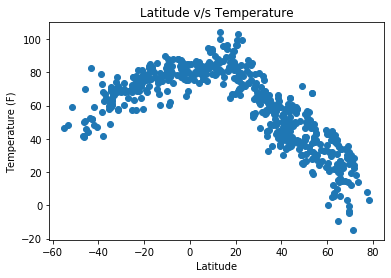

In [10]:
#Plotting
plt.scatter(city_df["Latitude"], city_df["Temperature"])

#Formatting
plt.title("Latitude v/s Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

#Saving
plt.savefig('lat_temp.png')

#### Latitude vs. Humidity Plot

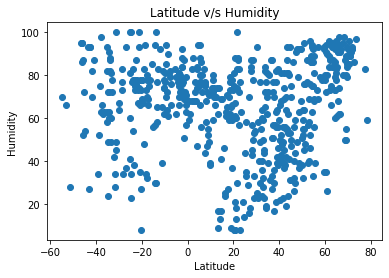

In [11]:
#Plotting
plt.scatter(city_df["Latitude"], city_df["Humidity"])

#Formatting
plt.title("Latitude v/s Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Saving
plt.savefig('lat_humidity.png')

#### Latitude vs. Cloudiness Plot

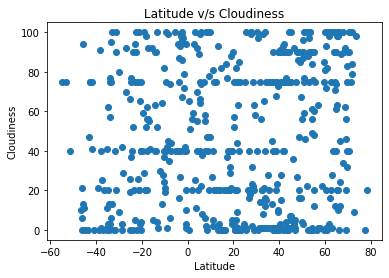

In [12]:
#Plotting
plt.scatter(city_df["Latitude"], city_df["Cloudiness"])

#Formatting
plt.title("Latitude v/s Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Saving
plt.savefig('lat_cloudiness.png')

#### Latitude vs. Wind Speed Plot

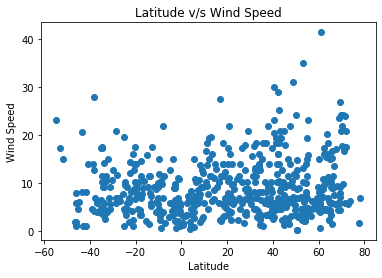

In [13]:
#Plotting
plt.scatter(city_df["Latitude"], city_df["Wind Speed"])

#Formatting
plt.title("Latitude v/s Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Saving
plt.savefig('lat_windspeed.png')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem = city_df.loc[city_df["Latitude"] >= 0, :]
northern_hem.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Clyde River,70.47,-68.59,12.20,85,90,24.16
1,Yellowknife,62.46,-114.35,12.33,66,20,17.22
3,Tubualá,9.52,-79.03,93.13,49,20,9.17
4,Jamestown,42.10,-79.24,34.48,69,90,28.86
5,Pasil,17.38,121.13,64.54,71,77,2.01


In [15]:
southern_hem = city_df.loc[city_df["Latitude"] <= 0, :]
southern_hem.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
2,Vaini,-21.20,-175.20,64.40,93,20,2.24
7,Rikitea,-23.12,-134.97,76.86,75,94,6.13
9,Port Alfred,-33.59,26.89,66.81,81,95,2.44
11,Castro,-24.79,-50.01,71.74,34,37,4.25
13,Atuona,-9.80,-139.03,81.95,77,19,11.95


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(10, 20, 'y = -1.09x + 96.3')

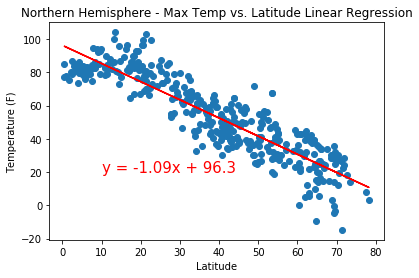

In [16]:
#Plotting
plt.scatter(northern_hem["Latitude"], northern_hem["Temperature"])

#Formatting
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

#Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem["Latitude"], northern_hem["Temperature"])
regress_values = northern_hem["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northern_hem["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(-50, 85, 'y = 0.63x + 84.94')

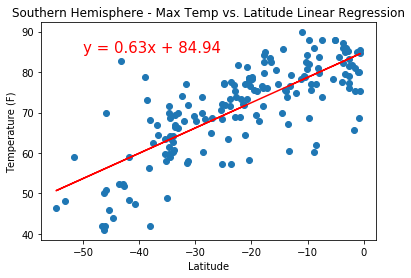

In [17]:
#Plotting
plt.scatter(southern_hem["Latitude"], southern_hem["Temperature"])

#Formatting
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

#Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem["Latitude"], southern_hem["Temperature"])
regress_values = southern_hem["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hem["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(45, 20, 'y = 0.33x + 50.78')

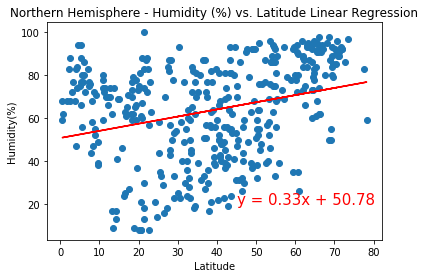

In [18]:
#Plotting
plt.scatter(northern_hem["Latitude"], northern_hem["Humidity"])

#Formatting
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

#Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem["Latitude"], northern_hem["Humidity"])
regress_values = northern_hem["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northern_hem["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(-45, 30, 'y = 0.13x + 72.65')

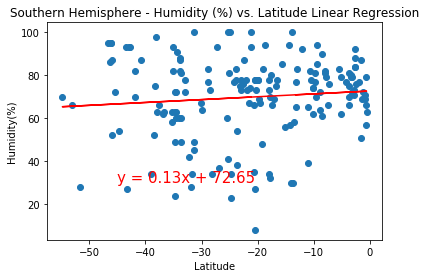

In [19]:
#Plotting
plt.scatter(southern_hem["Latitude"], southern_hem["Humidity"])

#Formatting
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

#Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem["Latitude"], southern_hem["Humidity"])
regress_values = southern_hem["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(southern_hem["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(-45,30),fontsize=15,color="red")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(45, 60, 'y = 0.35x + 33.55')

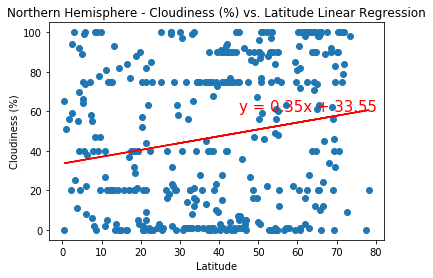

In [20]:
#Plotting
plt.scatter(northern_hem["Latitude"], northern_hem["Cloudiness"])

#Formatting
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem["Latitude"], northern_hem["Cloudiness"])
regress_values = northern_hem["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northern_hem["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(45,60),fontsize=15,color="red")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(-50, 50, 'y = 0.61x + 58.16')

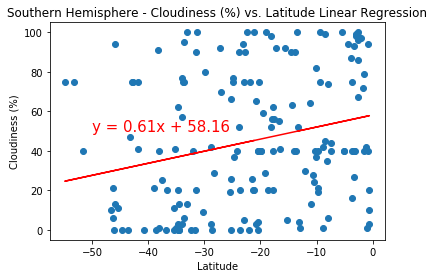

In [21]:
#Plotting
plt.scatter(southern_hem["Latitude"], southern_hem["Cloudiness"])

#Formatting
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem["Latitude"], southern_hem["Cloudiness"])
regress_values = southern_hem["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(southern_hem["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(10, 30, 'y = 0.05x + 7.53')

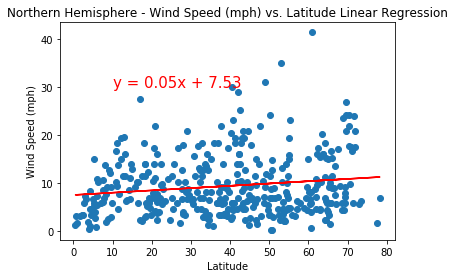

In [22]:
#Plotting
plt.scatter(northern_hem["Latitude"], northern_hem["Wind Speed"])

#Formatting
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem["Latitude"], northern_hem["Wind Speed"])
regress_values = northern_hem["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northern_hem["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(-50, 15, 'y = -0.06x + 6.74')

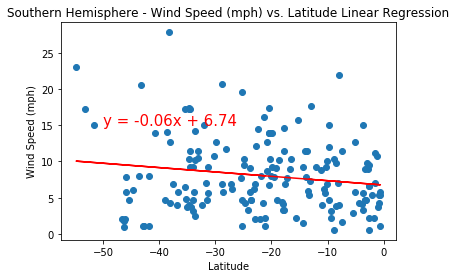

In [24]:
#Plotting
plt.scatter(southern_hem["Latitude"], southern_hem["Wind Speed"])

#Formatting
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem["Latitude"], southern_hem["Wind Speed"])
regress_values = southern_hem["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(southern_hem["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")